In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


 Data

In [ ]:
!unzip "/content/drive/My Drive/ECG/data.zip"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory("/content/data/train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("/content/data/test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


In [ ]:
class_indices = x_train.class_indices

In [ ]:
class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [ ]:
dir = "/content/data/train/"

In [ ]:
def ecg_img(path,i):
    plt.subplot(2,3,i+1)
    plt.title("Label = "+str(i))
    img = mpimg.imread(dir+path)
    plt.imshow(img)
    plt.show

In [ ]:
 Train = ["Left Bundle Branch Block/fig_5646.png",
 "Normal/fig_10003.png",
 "Premature Atrial Contraction/fig_105.png",
 "Premature Ventricular Contractions/VEBfig_21.png",
 "Right Bundle Branch Block/fig_1009.png",
 "Ventricular Fibrillation/VFEfig_140.png"]


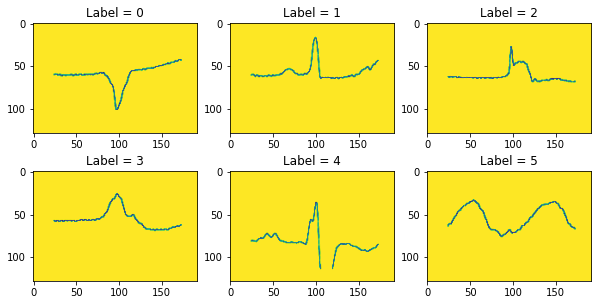

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(6):
   ecg_img(Train[i],i)

CNN

In [ ]:
model = Sequential()

model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=9, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/9
  1/480 [..............................] - ETA: 29s - loss: 0.2710 - accuracy: 0.9375

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


480/480 [==============================] - 27s 56ms/step - loss: 0.2130 - accuracy: 0.9319 - val_loss: 0.3783 - val_accuracy: 0.8782
Epoch 2/9
480/480 [==============================] - 27s 55ms/step - loss: 0.1782 - accuracy: 0.9410 - val_loss: 0.3693 - val_accuracy: 0.8782
Epoch 3/9
480/480 [==============================] - 27s 55ms/step - loss: 0.1615 - accuracy: 0.9476 - val_loss: 0.3494 - val_accuracy: 0.8957
Epoch 4/9
480/480 [==============================] - 27s 56ms/step - loss: 0.1466 - accuracy: 0.9515 - val_loss: 0.4226 - val_accuracy: 0.8825
Epoch 5/9
480/480 [==============================] - 27s 56ms/step - loss: 0.1407 - accuracy: 0.9549 - val_loss: 0.5147 - val_accuracy: 0.8763
Epoch 6/9
480/480 [==============================] - 26s 55ms/step - loss: 0.1258 - accuracy: 0.9585 - val_loss: 0.5314 - val_accuracy: 0.8633
Epoch 7/9
480/480 [==============================] - 26s 55ms/step - loss: 0.1243 - accuracy: 0.9605 - val_loss: 0.4665 - val_accuracy: 0.8731
Epoch 8/9

Accuracy = 96%

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS = 9

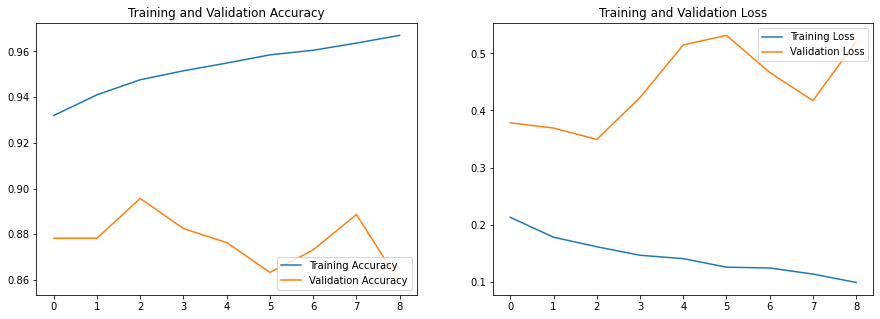

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('ECG.h5')

In [ ]:
index=['left Bundle Branch block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation']

In [ ]:
def pred(i):
  pred = model.predict(i)
  y_pred=np.argmax(pred)
  result = str(index[y_pred])
  confidence = round((100 * np.max(pred[0])), 2)
  return y_pred,result,confidence

In [ ]:
dir1 = "/content/data/test/"

In [ ]:
Test = ["Left Bundle Branch Block/fig_5912.png",
 "Normal/fig_3020.png",
 "Premature Atrial Contraction/fig_1414.png",
 "Premature Ventricular Contractions/VEBfig_55.png",
 "Right Bundle Branch Block/fig_519.png",
 "Ventricular Fibrillation/VFEfig_163.png"]


In [ ]:
def prediction(i):
  img0=image.load_img(dir1+Test[i],target_size=(64,64))
  x=image.img_to_array(img0)
  x=np.expand_dims(x,axis=0)
  plt.subplot(2,3,i+1)
  a,p,c = pred(x)
  plt.title('Actual = {} \nPredicted ={} \n Predicted Label=\n{} \nConfidence = {}%'.format(i,a,p,c))
  img = mpimg.imread(dir1+Test[i])
  plt.imshow(img)
  plt.show

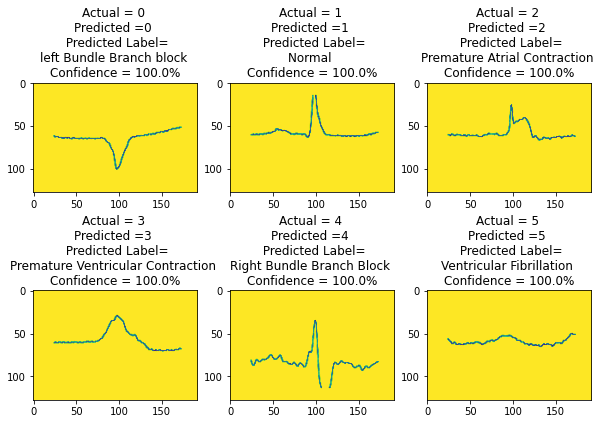

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(6):
   prediction(i)

<function matplotlib.pyplot.show>

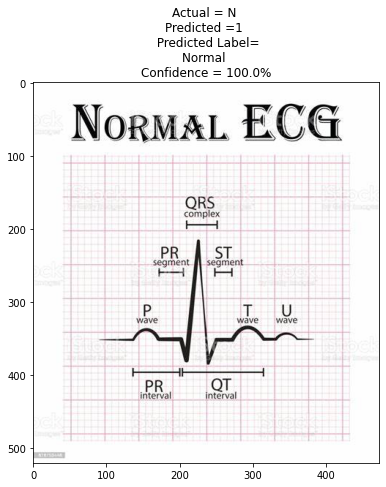

In [ ]:
plt.figure(figsize=(15, 7))
img6=image.load_img("/content/drive/My Drive/ECG/Data/R_Normal.jpg",target_size=(64,64))
x=image.img_to_array(img6)
x=np.expand_dims(x,axis=0)
a,p,c = pred(x)
plt.title('Actual = {} \nPredicted ={} \n Predicted Label=\n{} \nConfidence = {}%'.format("N",a,p,c))
img = mpimg.imread("/content/drive/My Drive/ECG/Data/R_Normal.jpg")
plt.imshow(img)
plt.show
